In [10]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import time
import copy
import math
from sklearn.decomposition import PCA
import itertools
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.manifold import TSNE
from scipy.stats import nct
from scipy.stats import chi2
%load_ext rpy2.ipython

/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [123]:
n_samples = 500
p = 2
k = 3
def sim1_fun(p,k,n_samples):
    mu = np.zeros(p*k)
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=n_samples)
        sample[:,i] = sample_i
        mu[i] = mu_i
    sample1 = np.zeros((n_samples*k,p))
    mu1 = np.zeros((k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
        mu1[(j-1),:] = mu[p*(j-1):p*j] + 2*(j-1)
    return(sample1)


def sim2_fun(p,k,n_samples):
    tau = np.zeros(p*k)
    sample = np.zeros((n_samples,p*k))
    #tau = np.zeros(p*k)
    for i in range(0,p*k):
        tau_i = np.random.uniform(0.1,0.9)
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(0, scale=5, size=n_samples)
        s_co = co_fun(tau_i,sample_i)+ mu_i
        sample[:,i] = s_co
        tau[i] = tau_i
    sample1 = np.zeros((n_samples*k,p))
    tau1 = np.zeros((k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j]+ (-1)**(j)*7*(j-1)
        tau1[(j-1),:] = tau[p*(j-1):p*j]
    return(sample1)

def sim3_fun(p,k,n_samples):
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        a_i = np.random.randint(1, 10)
        b_i = np.random.randint(11, 20)
        if i%2 != 0:
            sample_i = np.random.beta(a_i, b_i, size=n_samples)
        else:
            sample_i = np.random.beta(b_i, a_i, size=n_samples)
        sample[:,i] = sample_i
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j]
    return(sample1)

def sim4_fun(p,k,n_samples):
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p):
        a_i = np.random.randint(51, 60)
        b_i = np.random.randint(21, 30)
        if i%2 != 0:
            sample_i = np.random.f(a_i, a_i, size=n_samples)+1
        else:
            sample_i = np.random.f(b_i, b_i, size=n_samples)+1
        sample[:,i] = sample_i
    for i in range(p,p*(k-1)):
        a_i = np.random.randint(5, 15)
        b_i = np.random.randint(25,35)
        if i%2 != 0:
            sample_i = np.random.f(b_i, b_i, size=n_samples)
        else:
            sample_i = np.random.f(a_i, a_i, size=n_samples)
        sample[:,i] = sample_i
    for i in range(p*(k-1),p*k):
        a_i = np.random.randint(15, 25)
        b_i = np.random.randint(60, 70)
        if i%2 != 0:
            sample_i = np.random.f(a_i, b_i, size=n_samples)
        else:
            sample_i = np.random.f(a_i, b_i, size=n_samples)+2.2
        sample[:,i] = sample_i
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j]
    return(sample1)

def sim5_fun(p,k,n_samples):
    a1 = [60,10,50]
    a2 = [60,10,25]
    a3 = [30,60,10]
    a4 = [30,60,70]
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        if i%(2*k) == 0:
            sample[:,i] = np.random.f(a1[0],a3[0], size= n_samples)+1
        if i%(2*k) == 1:
            sample[:,i] = np.random.f(a1[1],a3[1], size= n_samples)-2
        if i%(2*k) == 2:
            sample[:,i] = np.random.f(a1[2],a3[2], size= n_samples)
        if i%(2*k) == 3:
            sample[:,i] = np.random.f(a2[0],a4[0], size= n_samples)+1
        if i%(2*k) == 4:
            sample[:,i] = np.random.f(a2[1],a4[1], size= n_samples)+1
        if i%(2*k) == 5:
            sample[:,i] = np.random.f(a2[2],a4[2], size= n_samples)   
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
    return(sample1)


def sim6_fun(p,k,n_samples):
    df = [10, 10, 10]
    nc = [3, -1.5, 2.5]
    loc = [0, 2, 1, 0.5, 1]
    scale= 0.5
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        if i%(2*k) == 0:
            sample[:,i] = nct.rvs( df[0], nc[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 1:
            sample[:,i] = nct.rvs( df[1], nc[1], loc[1], scale, size=n_samples)
        if i%(2*k) == 2:
            sample[:,i] = nct.rvs( df[2], nc[2], loc[2], scale, size=n_samples)
        if i%(2*k) == 3:
            sample[:,i] = nct.rvs( df[0], nc[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 4:
            sample[:,i] = nct.rvs( df[1], nc[1], loc[3], scale, size=n_samples)
        if i%(2*k) == 5:
            sample[:,i] = nct.rvs( df[2], nc[2], loc[4], scale, size=n_samples)   
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
    return(sample1)

def sim7_fun(p,k,n_samples):
    df = [4, 5, 3]
    loc = [0, 4, 3, -1.5]
    scale= 0.5
    sample = np.zeros((n_samples,p*k))
    for i in range(0,p*k):
        if i%(2*k) == 0:
            sample[:,i] = chi2.rvs( df[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 1:
            sample[:,i] = chi2.rvs( df[1], loc[1], scale, size=n_samples)
        if i%(2*k) == 2:
            sample[:,i] = chi2.rvs( df[2], loc[2], scale, size=n_samples)
        if i%(2*k) == 3:
            sample[:,i] = chi2.rvs( df[0], loc[0], scale, size=n_samples)
        if i%(2*k) == 4:
            sample[:,i] = chi2.rvs( df[1], loc[3], scale, size=n_samples)
        if i%(2*k) == 5:
            sample[:,i] = chi2.rvs( df[2], loc[2], scale, size=n_samples)  
    sample1 = np.zeros((n_samples*k,p))
    for j in range(1,k+1):
        sample1[n_samples*(j-1):n_samples*j,:] = sample[:,p*(j-1):p*j] + 2*(j-1)
    return(sample1)

In [32]:
p = 2
k1 = 100
k2 = 200
k3 = 500
def sim8_fun(p,k1,k2,k3):
    n_samples = [k1,k2,k3]
    k = len(n_samples)
    mu = np.zeros(p*k)
    sample = np.zeros((sum(n_samples),p))
    for i1 in range(k1*p):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=k1)
    sample[:k1,:] = sample_i-2
    for i2 in range(k2):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=k2)
    sample[k1:(k1+k2),:] = sample_i
        #mu1 = np.zeros((k,p))
    for i3 in range(k3):
        mu_i = np.random.randint(0, 10)
        sample_i = np.random.normal(loc= mu_i, scale=2, size=k3)
    sample[k2:(k2+k3),:] = sample_i+2
        #mu1 = np.zeros((k,p))
    #for j in range(len(n_samples)):
        #sample1[j-1:j,:] = sample[j-1:j,:] + 2*(j-1)
        #mu1[(j-1),:] = mu[p*(j-1):p*j] + 2*(j-1)
    return(sample)

In [117]:
blobs = datasets.make_blobs(n_samples=[100,500,200], random_state =170, cluster_std =[1.0, 2.5, 0.5])

In [35]:
def co_fun(tau,s):
    num_lef =  2*math.sqrt(tau)
    num_rig =  2*math.sqrt(1-tau)
    deno = math.sqrt(tau) + math.sqrt(1-tau)
    s_co = copy.deepcopy(s)
    for i in range(len(s)):
        if s[i]< 0:
            s_co[i] = num_lef/deno * (1/math.sqrt(1-tau)) * s[i]
        else:
            s_co[i] = num_rig/deno * (1/math.sqrt(tau)) * s[i]
            i = i+1
    return s_co

In [125]:
#def sim_clu(n_samples,p,k):
y = np.zeros(n_samples*k)
y[(n_samples+1):n_samples*(k-1)]=1
y[(n_samples*(k-1)+1):n_samples*k]=2
#y = blobs[1]
r = 2
acc = np.zeros((8,r))
ari = np.zeros((8,r))
for i in range(r):
    X = sim7_fun(p,k,n_samples)
    #print(tau)
    #X = PCA(n_components=20).fit_transform(X_ini)
    #X = TSNE(n_components=3).fit_transform(X)
    #k-expectile
    C1, clusters1 = k_expectile_new(X, 3)
    acc[0,i] = cluster_index(clusters1,y,k)
    ari[0,i] = metrics.adjusted_rand_score(y, clusters1)
    #k-means
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    clusters2 = kmeans.labels_
    acc[1,i] = cluster_index(clusters2,y,k)
    ari[1,i] = metrics.adjusted_rand_score(y, clusters2)
    #spectral
    spectral = SpectralClustering(n_clusters=k)
    spectral.fit(X)
    clusters3 = spectral.labels_
    acc[2,i] = cluster_index(clusters3,y,k)
    ari[2,i] = metrics.adjusted_rand_score(y, clusters3)
    #hierarcicel
    wald = AgglomerativeClustering(n_clusters=k, linkage='ward')
    wald.fit(X)
    clusters4 = wald.labels_
    acc[3,i] = cluster_index(clusters4,y,k)
    ari[3,i] = metrics.adjusted_rand_score(y, clusters4)
    #quantile
    %R require('QuClu')
    %R -i X
    %R -i p
    %R qclu1 = alg.CS(X, k = 3, eps = 1e-08, it.max = 100, B = 30, lambda = rep(1,p))
    %R qclu2 = alg.CU(X, k = 3, eps = 1e-08, it.max = 100, B = 30)
    %R qclu3 = alg.VS(X, k = 3, eps = 1e-08, it.max = 100, B = 30, lambda = rep(1,p))
    %R qclu4 = alg.VU(X, k = 3, eps = 1e-08, it.max = 100, B = 30)
    %R c1 = qclu1$cl
    %R c2 = qclu2$cl
    %R c3 = qclu3$cl
    %R c4 = qclu4$cl
    %R -o c1
    %R -o c2
    %R -o c3
    %R -o c4
    c1 = np.array(c1)-1
    c2 = np.array(c2)-1
    c3 = np.array(c3)-1
    c4 = np.array(c4)-1
    acc[4,i] = cluster_index(c1,y,k)
    ari[4,i] = metrics.adjusted_rand_score(y, c1)
    acc[5,i] = cluster_index(c2,y,k)
    ari[5,i] = metrics.adjusted_rand_score(y, c2)
    acc[6,i] = cluster_index(c3,y,k)
    ari[6,i] = metrics.adjusted_rand_score(y, c3)
    acc[7,i] = cluster_index(c4,y,k)
    ari[7,i] = metrics.adjusted_rand_score(y, c4)
acc_m, acc_s = np.mean(acc,axis =1)*100,np.std(acc,axis=1)
ari_m, ari_s = np.mean(ari,axis =1)*100,np.std(ari,axis =1)
rou = lambda x: round(x, 2)
rou_v = np.vectorize(rou)
rou1 = lambda x: round(x, 3)
rou_v1 = np.vectorize(rou1)
print(n_samples*k,p, rou_v(acc_m),rou_v1(acc_s),rou_v(ari_m),rou_v1(ari_s))    

0.4043956140733871
0.17633597581100385
0.04572442695524087
0.028848465288476097
0.01618346513565534
0.009364851526580866
0.00790280322013629
0.007894500102279331
0.006688853313567445
0.006686510909456297
0.3932679079605984
0.16454019853611218
0.06455162057531674
0.03203469969005812
0.01959745990324547
0.018741624756503265
0.01692179769271372
0.015144809424657185
0.018834498395249685
0.01448792823557281
1500 2 [91.37 90.9  61.37 86.97 94.57 91.57 94.57 91.53] [0.002 0.001 0.278 0.014 0.001 0.002 0.001 0.002] [75.72 74.53 35.05 66.1  84.24 76.14 84.24 76.06] [0.006 0.002 0.35  0.031 0.003 0.004 0.003 0.005]


In [90]:
#Euclidean distance
def dist(a, b):
    return np.linalg.norm(a - b, None)
#Tau-distance
def dist_fun(a,m,tau):
    dist = np.zeros(len(m))
    for i in range(len(m)):
        d = a - m[i]
        ele = 0
        for j in range(len(d)):
            col = d[j]
            ad = (1-tau[i,j])* sum(col[col<0]**2) + tau[i,j]* sum(col[col>=0]**2)
            ele = ele + ad
        dist[i] = ele
    return dist
#Expectile estimation
def expectile_fun(group, tau):
    e = np.mean(group, axis=0)
    e_new = np.zeros(e.shape)
    while dist(e_new , e) != 0:
        c = group[:,:]- e
        e = copy.deepcopy(e_new)
        for i in range(len(c[0])):
            d = c[:,i]
            a_co = group[:,i]
            neg = a_co[d<0]
            pos = a_co[d>=0]
            norm = tau[i]*len(pos)+ (1-tau[i])*len(neg)
            e_new[i] = (tau[i]* sum(pos) + (1-tau[i])* sum(neg))/norm
    return  e_new
#Estimate optimal taus
def tau_fun(points, mu):
    tau_list = []
    dis = points - mu
    for i in range(len(mu)):
        res = dis[:,i]
        e_neg = -sum(res[res < 0])/len(res[res < 0])
        e_pos = sum(res[res >= 0])/len(res[res >= 0])
        c = e_neg/e_pos
        tau = c/(1+c)
        tau_list.append(tau)
    return tau_list
# Define K expectile clustering 
def k_expectile_new(X, k): 
    X = np.array(X)
# Initialize cluster centers as K means cluster centers
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    C = kmeans.cluster_centers_

# To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    clusters = np.zeros(len(X))
# Initialize tau = 0.5
    tau_list = np.ones((k, len(C[0])))*0.5
# Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old)
# Loop will run till the error 
    #while error >= 0.5:
    for r in range(10):
    # Assigning each value to its closest cluster
        for i in range(len(X)):
            for j in range (len(C[0])):
                distances = dist_fun(X[i], C, tau_list)
                cluster = np.argmin(distances)
                clusters[i] = cluster
    # Storing the old centroid values
        C_old = copy.deepcopy(C)
    # Finding the new centroids and tau
        for d in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == d]
            points = np.array(points)
    # Updating taus
            tau = tau_fun(points,C[d])
            C[d] = expectile_fun(points,tau)
            tau_list[d] = tau
        error = dist(C, C_old)
        #print(tau_list)
        print(error)
    return C, clusters

In [124]:
#matching cluster index
import itertools
def cluster_index(clusters, target, k):
    list_p = list(range(1,k+1,1))
    permu = list(itertools.permutations(list_p,k))
    new = np.zeros(clusters.shape)
    acc = np.zeros(len(permu))
    for i in range(len(permu)):
        for j in range(k):
            new[np.where(clusters == j)] = permu[i][j]-1
        acc[i] = np.sum(new == target)/len(target)
    index = permu[np.argmax(acc)]
    #print(index)
    return np.max(acc)

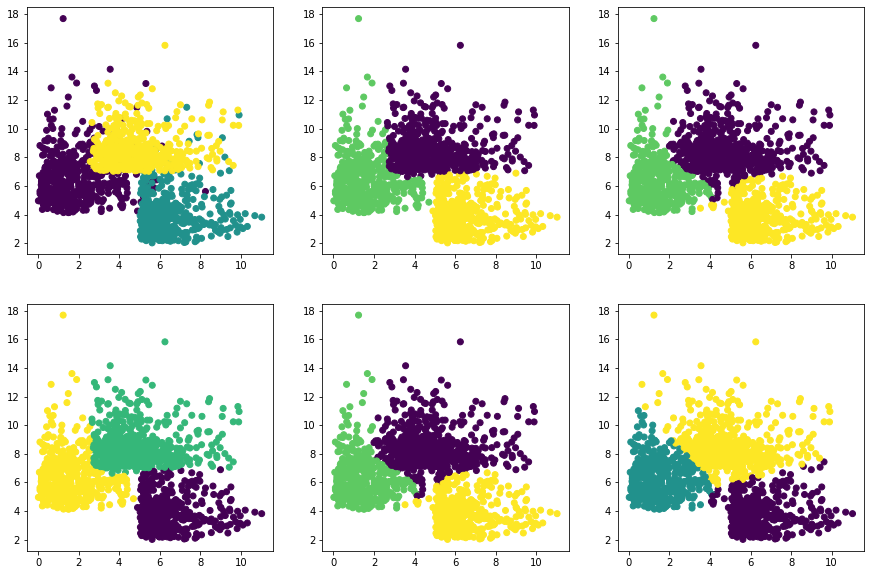

In [126]:
#X = blobs[0]
#y = blobs[1]
#y[(n_samples+1):n_samples*(k-1)]=1
#y[(n_samples*(k-1)+1):n_samples*k]=2
#y =y+1

%R require('QuClu')
%R -i X
%R -i p
%R qclu1 = alg.CS(X, k = 3, eps = 1e-08, it.max = 100, B = 30, lambda = rep(1,p))
%R qclu2 = alg.CU(X, k = 3, eps = 1e-08, it.max = 100, B = 30)
%R qclu3 = alg.VS(X, k = 3, eps = 1e-08, it.max = 100, B = 30, lambda = rep(1,p))
%R qclu4 = alg.VU(X, k = 3, eps = 1e-08, it.max = 100, B = 30)
%R c1 = qclu1$cl
%R c2 = qclu2$cl
%R c3 = qclu3$cl
%R c4 = qclu4$cl
%R -o c1
%R -o c2
%R -o c3
%R -o c4
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
c5 = kmeans.labels_
#C1, c5 = k_expectile_new(X, 3)
def cluster_index(clusters, target, k):
    list_p = list(range(1,k+1,1))
    permu = list(itertools.permutations(list_p,k))
    new = np.zeros(clusters.shape)
    acc = np.zeros(len(permu))
    for i in range(len(permu)):
        for j in range(k):
            new[np.where(clusters == j+1)] = permu[i][j]
        acc[i] = np.sum(new == target)/len(target)
    index = permu[np.argmax(acc)]
    #print(index)
    return index, np.max(acc)
index1,acc1 = cluster_index(c1,y,k)
index2,acc2 = cluster_index(c2,y,k)
index3,acc3 = cluster_index(c3,y,k)
index4,acc4 = cluster_index(c4,y,k)
index5,acc5 = cluster_index(c5,y,k)
new1 = np.zeros(len(c1))-1
new2 = np.zeros(len(c2))-1
new3 = np.zeros(len(c3))-1
new4 = np.zeros(len(c4))-1
new5 = np.zeros(len(c5))-1
for j in range(k):
    new1[np.where(c1 == j)] = index1[j]
for j in range(k):
    new2[np.where(c2 == j)] = index2[j]
for j in range(k):
    new3[np.where(c3 == j)] = index3[j]
for j in range(k):
    new4[np.where(c4 == j)] = index4[j]
for j in range(k):
    new5[np.where(c5 == j)] = index5[j]
    
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplot(231)
plt.scatter(X[:,0],X[:,1],c = y)
plt.subplot(232)
plt.scatter(X[:,0],X[:,1],c = new1)
plt.subplot(233)
plt.scatter(X[:,0],X[:,1],c = new2)
plt.subplot(234)
plt.scatter(X[:,0],X[:,1],c = new3)
plt.subplot(235)
plt.scatter(X[:,0],X[:,1],c = new4)
plt.subplot(236)
plt.scatter(X[:,0],X[:,1],c = new5)

In [46]:
X = sim2_fun(p,k,n_samples)

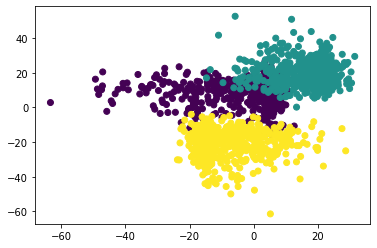

In [47]:
plt.scatter(X[:,0],X[:,1],c = y)